<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/cnn/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 11s 20ms/step - loss: 0.6545 - accuracy: 0.5646 - val_loss: 0.3608 - val_accuracy: 0.8404
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2809 - accuracy: 0.8882 - val_loss: 0.2884 - val_accuracy: 0.8800
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1339 - accuracy: 0.9564 - val_loss: 0.3283 - val_accuracy: 0.8727
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0583 - accuracy: 0.9854 - val_loss: 0.4748 - val_accuracy: 0.8561
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0302 - accuracy: 0.9922 - val_loss: 0.4762 - val_accuracy: 0.8731
Epoch 6/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.5676 - val_accuracy: 0.8736
Epoch 7/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.66

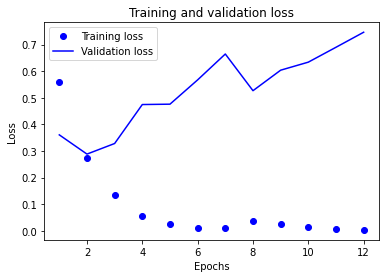

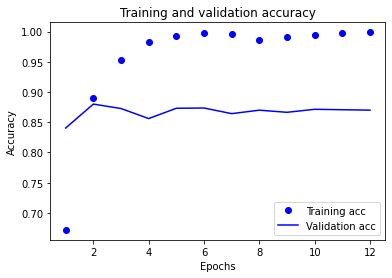

              precision    recall  f1-score   support

           0      0.893     0.863     0.878     12500
           1      0.868     0.897     0.882     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6476 - accuracy: 0.5796 - val_loss: 0.3432 - val_accuracy: 0.8484
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2805 - accuracy: 0.8871 - val_loss: 0.2892 - val_accuracy: 0.8787
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1435 - accuracy: 0.9524 - val_loss: 0.3177 - val_accuracy: 0.8755
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0562 - accuracy: 0.9856 - val_loss: 0.4168 - val_accuracy: 0.8645
Epoch 5/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0

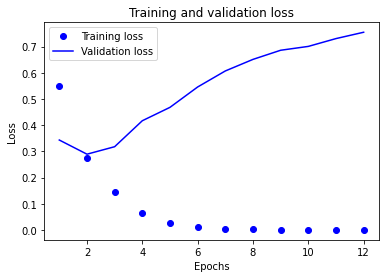

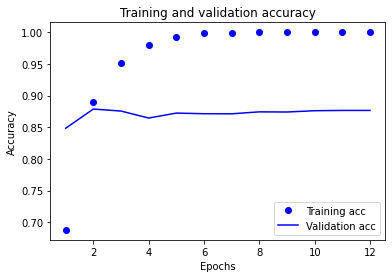

              precision    recall  f1-score   support

           0      0.890     0.864     0.877     12500
           1      0.868     0.893     0.880     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6346 - accuracy: 0.5936 - val_loss: 0.3481 - val_accuracy: 0.8477
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2634 - accuracy: 0.8983 - val_loss: 0.3183 - val_accuracy: 0.8699
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1298 - accuracy: 0.9554 - val_loss: 0.3060 - val_accuracy: 0.8818
Epoch 4/100
176/176 [==============================] - 3s 15ms/step - loss: 0.0551 - accuracy: 0.9863 - val_loss: 0.4008 - val_accuracy: 0.8797
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

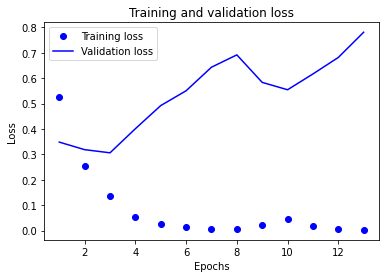

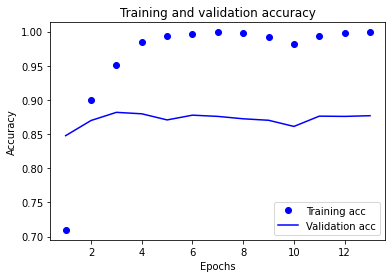

              precision    recall  f1-score   support

           0      0.888     0.874     0.881     12500
           1      0.876     0.890     0.883     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6377 - accuracy: 0.5854 - val_loss: 0.3700 - val_accuracy: 0.8365
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2708 - accuracy: 0.8933 - val_loss: 0.3501 - val_accuracy: 0.8497
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1353 - accuracy: 0.9559 - val_loss: 0.3424 - val_accuracy: 0.8633
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0655 - accuracy: 0.9807 - val_loss: 0.4194 - val_accuracy: 0.8661
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

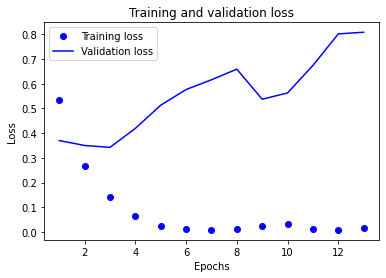

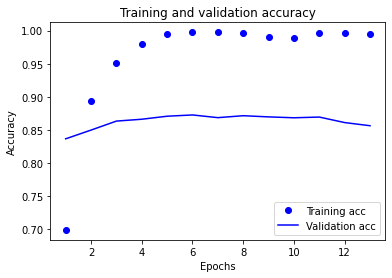

              precision    recall  f1-score   support

           0      0.824     0.924     0.871     12500
           1      0.913     0.803     0.855     12500

    accuracy                          0.863     25000
   macro avg      0.869     0.863     0.863     25000
weighted avg      0.869     0.863     0.863     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 4s 19ms/step - loss: 0.6465 - accuracy: 0.5783 - val_loss: 0.3622 - val_accuracy: 0.8394
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2756 - accuracy: 0.8891 - val_loss: 0.3012 - val_accuracy: 0.8734
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1359 - accuracy: 0.9542 - val_loss: 0.3400 - val_accuracy: 0.8670
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0647 - accuracy: 0.9820 - val_loss: 0.4084 - val_accuracy: 0.8688
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

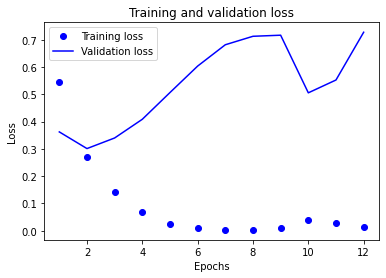

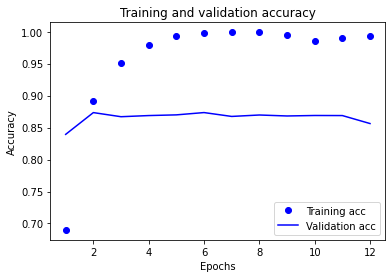

              precision    recall  f1-score   support

           0      0.868     0.880     0.874     12500
           1      0.879     0.866     0.873     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 4s 16ms/step - loss: 0.6527 - accuracy: 0.5724 - val_loss: 0.3501 - val_accuracy: 0.8471
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2751 - accuracy: 0.8911 - val_loss: 0.2947 - val_accuracy: 0.8762
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1262 - accuracy: 0.9605 - val_loss: 0.3621 - val_accuracy: 0.8680
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0521 - accuracy: 0.9871 - val_loss: 0.5510 - val_accuracy: 0.8523
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

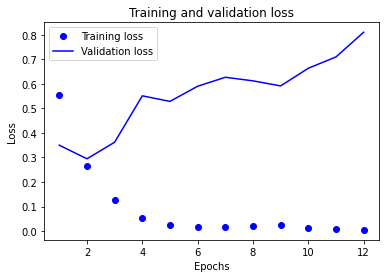

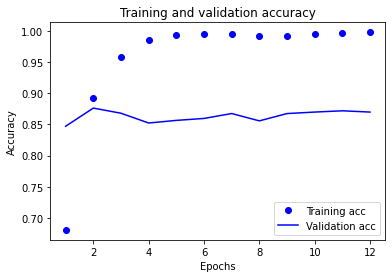

              precision    recall  f1-score   support

           0      0.862     0.896     0.879     12500
           1      0.892     0.857     0.874     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6667 - accuracy: 0.5419 - val_loss: 0.3391 - val_accuracy: 0.8529
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2737 - accuracy: 0.8889 - val_loss: 0.2879 - val_accuracy: 0.8794
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1288 - accuracy: 0.9579 - val_loss: 0.3225 - val_accuracy: 0.8798
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 0.4077 - val_accuracy: 0.8692
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

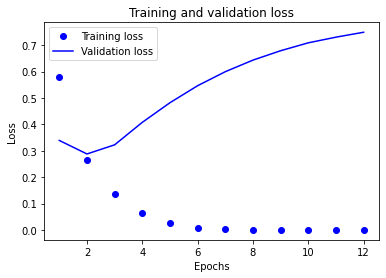

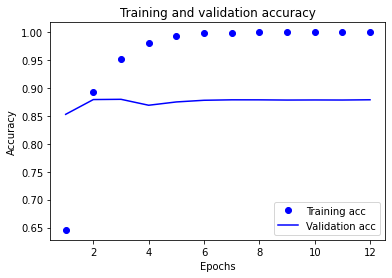

              precision    recall  f1-score   support

           0      0.859     0.908     0.883     12500
           1      0.903     0.851     0.876     12500

    accuracy                          0.879     25000
   macro avg      0.881     0.879     0.879     25000
weighted avg      0.881     0.879     0.879     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6563 - accuracy: 0.5652 - val_loss: 0.3463 - val_accuracy: 0.8497
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2670 - accuracy: 0.8929 - val_loss: 0.3071 - val_accuracy: 0.8702
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1274 - accuracy: 0.9575 - val_loss: 0.3332 - val_accuracy: 0.8730
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0506 - accuracy: 0.9867 - val_loss: 0.4077 - val_accuracy: 0.8719
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

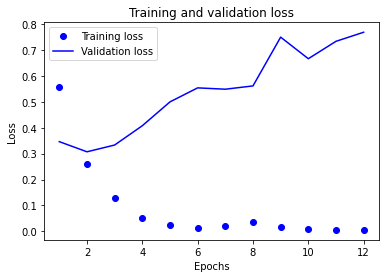

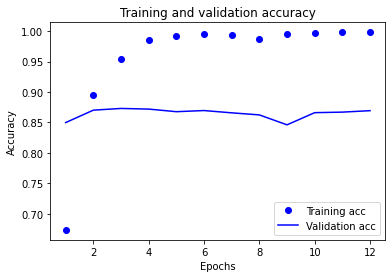

              precision    recall  f1-score   support

           0      0.911     0.820     0.863     12500
           1      0.837     0.920     0.876     12500

    accuracy                          0.870     25000
   macro avg      0.874     0.870     0.870     25000
weighted avg      0.874     0.870     0.870     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6453 - accuracy: 0.5785 - val_loss: 0.3438 - val_accuracy: 0.8492
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2738 - accuracy: 0.8867 - val_loss: 0.3021 - val_accuracy: 0.8724
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1287 - accuracy: 0.9545 - val_loss: 0.3419 - val_accuracy: 0.8716
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0505 - accuracy: 0.9879 - val_loss: 0.4664 - val_accuracy: 0.8606
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0

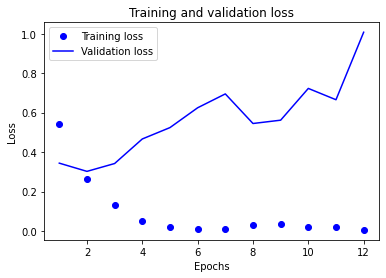

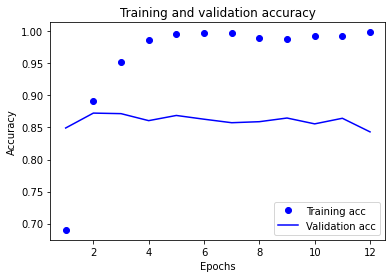

              precision    recall  f1-score   support

           0      0.855     0.896     0.875     12500
           1      0.891     0.848     0.869     12500

    accuracy                          0.872     25000
   macro avg      0.873     0.872     0.872     25000
weighted avg      0.873     0.872     0.872     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 4s 17ms/step - loss: 0.6491 - accuracy: 0.5752 - val_loss: 0.3578 - val_accuracy: 0.8414
Epoch 2/100
176/176 [==============================] - 3s 16ms/step - loss: 0.2788 - accuracy: 0.8856 - val_loss: 0.2949 - val_accuracy: 0.8766
Epoch 3/100
176/176 [==============================] - 3s 16ms/step - loss: 0.1445 - accuracy: 0.9495 - val_loss: 0.3156 - val_accuracy: 0.8768
Epoch 4/100
176/176 [==============================] - 3s 16ms/step - loss: 0.0555 - accuracy: 0.9851 - val_loss: 0.3954 - val_accuracy: 0.8750
Epoch 5/100
176/176 [==============================] - 3s 16ms/step - loss: 0.

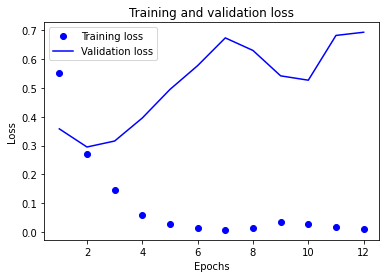

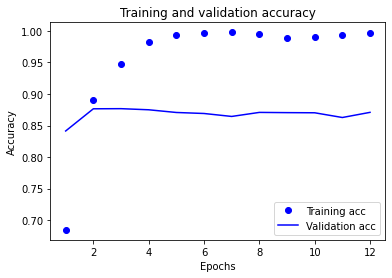

              precision    recall  f1-score   support

           0      0.913     0.832     0.871     12500
           1      0.846     0.921     0.882     12500

    accuracy                          0.877     25000
   macro avg      0.880     0.877     0.876     25000
weighted avg      0.880     0.877     0.876     25000


Average accuracy: 0.8775 (+/- 0.0076)
Average loss: 0.3015 (+/- 0.0236)
Average F1: 0.8749 (+/- 0.0081)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    GlobalMaxPool1D(),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
